In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import scipy.stats as ss
import pingouin as pg

In [22]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
alcohol = pd.read_csv(Path.cwd() / 'data' / 'alcohol.csv', index_col=['TYPE'])
alcohol.head()

,MEOH,ACET,BU1,MEPR,ACAL,LNPRO1
TYPE,,,,,,
typeA,3.0,15.0,0.2,9.0,9.0,5.86
typeA,23.0,13.0,0.8,9.0,2.0,6.67
typeA,65.0,96.0,0.4,9.0,4.0,5.31
typeA,279.0,66.0,0.9,36.0,4.8,5.45
typeA,292.0,210.0,1.1,34.0,8.0,4.08


In [6]:
X = alcohol.values
y = alcohol.index

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((57, 6), (20, 6), (57,), (20,))

In [16]:
clf = LinearDiscriminantAnalysis().fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred

array(['typeC', 'typeC', 'typeB', 'typeB', 'typeB', 'typeB', 'typeC',
       'typeB', 'typeB', 'typeC', 'typeC', 'typeC', 'typeA', 'typeB',
       'typeB', 'typeA', 'typeB', 'typeB', 'typeB', 'typeB'], dtype='<U5')

In [18]:
np.sum(y_test == y_pred) / len(y_test)

0.8

In [19]:
clf.score(X_test, y_test)

0.8

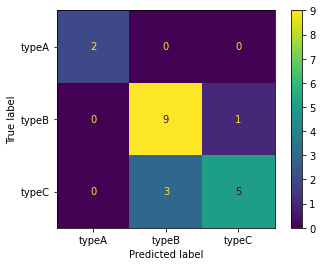

In [23]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)